Финал

https://ntcontest.ru/upload/problembooks-2324/6_%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%B5%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B8%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.pdf

In [ ]:
import pandas as pd
import numpy as np
import random

video_df = pd.read_csv('video.csv')
user_df = pd.read_csv('user.csv')
owner_df = pd.read_csv('owner.csv')
train_df = pd.read_csv('train.csv')

print(f'Таблица с информацией о видео: {video_df.shape}')
print(f'Таблица с информацией о пользователях: {user_df.shape}')
print(f'Таблица с информацией о каналах, где размещены видео: {owner_df.shape}')
print(f'Таблица с информацией о взаимодействиях пользователь-видео: {train_df.shape}')

Таблица с информацией о видео: (253511, 4)
Таблица с информацией о пользователях: (152911, 7)
Таблица с информацией о каналах, где размещены видео: (8114, 5)
Таблица с информацией о взаимодействиях пользователь-видео: (5657324, 4)


In [ ]:
train_df['video_id'].value_counts()

,count
video_id,
131005,20740
169519,19352
166825,19112
34204,18349
38943,18047
...,...
28683,1
60357,1
189324,1


In [ ]:
user_df['user_id'].nunique()

152911

In [ ]:
train_df.head()

,interaction_type,timestamp,user_id,video_id
0,view,1696271079748,126492,228525
1,view,1696271079760,117764,204343
2,view,1696271079988,11347,201337
3,view,1696271080451,125274,221842
4,view,1696271080451,125274,221842


In [ ]:
user_df.head()

,user_id,gender,age,language,city_id,birth_city_id,create_date
0,938,F,57.0,ru,5f7ca800fcb9368f78e3740cb68a4c4ebc62b005cd15cf...,NaN,2011-03-11 21:00:00
1,57571,F,68.0,ru,NaN,NaN,2011-03-11 21:00:00
2,50873,F,66.0,ru,a26a3a5b73942ee4af156df272ba2e722ddf4eb50ea396...,NaN,2011-03-11 21:00:00
3,4335,F,66.0,ru,5f7ca800fcb9368f78e3740cb68a4c4ebc62b005cd15cf...,NaN,2011-03-11 21:00:00
4,42138,F,66.0,ru,e1baf026d2d5c938c8ca66bac84c655345b92333a74937...,6b415eabf81e3cc85adac7d323a989a92198e76fe3f053...,2011-03-11 21:00:00


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152911 entries, 0 to 152910
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        152911 non-null  int64  
 1   gender         152911 non-null  object 
 2   age            152840 non-null  float64
 3   language       152911 non-null  object 
 4   city_id        115884 non-null  object 
 5   birth_city_id  62562 non-null   object 
 6   create_date    152911 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.2+ MB


In [ ]:
owner_df.head()

,owner_id,subscribers_count,last_active_date,city_id,create_date
0,7526,165651,1683122607372,NaN,1209015879040
1,8097,21447,1701308453896,NaN,1209043652837
2,1045,20541,1695378534162,8fb6fe36d1084805b2d52275f0de118124693863427a64...,1209045732987
3,5109,34665,1699803582198,8fb6fe36d1084805b2d52275f0de118124693863427a64...,1209054276227
4,8032,14301,1700229880599,NaN,1209057220000


In [ ]:
video_df.head()

,video_id,owner_id,duration,upload_timestamp
0,222589,6239,282,1522396925915
1,246427,6239,202,1522396925972
2,162117,6239,202,1522396926509
3,59871,6239,209,1522396928706
4,111590,6239,269,1522396928874


In [ ]:
video_df['video_id'].nunique()

253511

In [ ]:
# вычисляет количество пользователей, которые есть в таблице user, но которых нет в таблице train
# Если результат ноль — все пользователи из user.csv есть в train.csv
len(set(user_df['user_id']) - set(train_df['user_id']))

0

In [ ]:
video_df.shape

(253511, 4)

In [ ]:
len(set(video_df['video_id']) - set(train_df['video_id']))

25005

In [ ]:
# сортируем по двум параметрам user_id и время взаимодействия
# Это гарантирует, что события для каждого пользователя упорядочены по времени.
train_df = train_df.sort_values(['user_id', 'timestamp'])

train_df

,interaction_type,timestamp,user_id,video_id
2824505,view,1696152624699,0,975
3447153,view,1696394566937,0,135648
221606,view,1696525306531,0,90101
2373086,view,1696572383614,0,134665
5399388,view,1696614852984,0,160123
...,...,...,...,...
4380586,like,1697815399725,152910,208143
4392345,view,1697818326591,152910,11020
5159687,view,1697982723039,152910,137366
3753684,view,1698190912986,152910,144821


In [ ]:
train_df['video_id'].nunique()

228506

In [ ]:
train_df['user_id'].nunique()

In [ ]:
# группируем все взаимодействия по пользователям
# одна группа = 1 пользователь и все его действия
groups = train_df.groupby('user_id')

In [ ]:
len(groups) # всего групп = всего пользователей

152911

In [ ]:
groups.get_group(0) # user_id = 0
# так выглядит одна группа
# это один пользователь
# все действия отсортированы по timestamp
# = like*10 + view

,interaction_type,timestamp,user_id,video_id
2824505,view,1696152624699,0,975
3447153,view,1696394566937,0,135648
221606,view,1696525306531,0,90101
2373086,view,1696572383614,0,134665
5399388,view,1696614852984,0,160123
5255725,view,1696661388155,0,21520
254135,view,1696689726817,0,172302
254970,view,1696689969445,0,91130
5015087,view,1696782554387,0,226118
5060636,view,1696796265571,0,53735


In [ ]:
# ГЕНЕРАЦИЯ ПРИЗНАКОВ НОВЫХ

# Общее количество взаимодействий:
# для каждого пользователя добавляем новый столбец "count", который показывает, сколько всего действий он совершил.
# Пример: если у user_id = 1 было 5 взаимодействий, в каждой строке для этого пользователя будет count = 5.

# Нумерация действий: добавляем столбец "rank_s", который нумерует действия внутри каждой группы (начиная с 1).
# groups.cumcount() считает количество строк до текущей в группе, поэтому прибавляем 1, чтобы нумерация начиналась с 1.

train_df_2 = train_df.copy() # чтобы не потерять исходный датасет

train_df_2["count"] = groups['user_id'].transform("count")
train_df_2["rank_s"] = groups.cumcount() + 1

train_df_2

,interaction_type,timestamp,user_id,video_id,count,rank_s
2824505,view,1696152624699,0,975,21,1
3447153,view,1696394566937,0,135648,21,2
221606,view,1696525306531,0,90101,21,3
2373086,view,1696572383614,0,134665,21,4
5399388,view,1696614852984,0,160123,21,5
...,...,...,...,...,...,...
4380586,like,1697815399725,152910,208143,25,21
4392345,view,1697818326591,152910,11020,25,22
5159687,view,1697982723039,152910,137366,25,23
3753684,view,1698190912986,152910,144821,25,24


In [ ]:
# хронологическое разбиение данных по пользователям на две части
# например, тренировочную и валидационную выборку — по времени взаимодействия.

ratio = [0.7, 0.3] # 70% - train, 30% - test

splits = [] # список для хранения частей разбиения

prev_threshold = None # порог разбиения, для каждой группы пользователей он будет свой чтобый сохранить соотношение 70 на 30

for threshold in [0.7, 1]:
    condition = train_df_2["rank_s"] <= round(threshold * train_df_2["count"])
    if prev_threshold is not None:
        condition &= train_df_2["rank_s"] > round(prev_threshold * train_df_2["count"])
    splits.append(train_df_2[condition].drop(["rank_s", "count"], axis=1))
    prev_threshold = threshold

# train = train_df_2[train_df_2["rank_s"] <= round(0.7 * train_df_2["count"])]
# test = train_df_2[(train_df_2["rank_s"] <= round(1 * train_df_2["count"])) & (train_df_2["rank_s"] <= round(1 * train_df_2["count"])>0.7)]


# Если у пользователя 10 взаимодействий, при ratio = 0.7:

# Первая часть — первые 7 действий (70%)
# Вторая часть — оставшиеся 3 действия (30%)

# В итоге, код делает временное разбиение данных для каждого пользователя,
# чтобы модель могла учиться на прошлых взаимодействиях пользователя и проверяться на новых

# splits[0] - train
# splits[1] - test

print(splits[0].shape)
print(splits[1].shape)

(3960276, 4)
(1697048, 4)


In [ ]:
# деление по времени для одного пользователя
def train_val_split_time(df, split_by_column = 'user_id', ratio = 0.7, col_timestamp = 'timestamp'):
    df = df.sort_values([split_by_column, col_timestamp])
    groups = df.groupby(split_by_column)

    df["count"] = groups[split_by_column].transform("count")
    df["rank_s"] = groups.cumcount() + 1

    ratio = [ratio, 1 - ratio]
    splits = []
    prev_threshold = None
    for threshold in np.cumsum(ratio):
        condition = df["rank_s"] <= round(threshold * df["count"])
        if prev_threshold is not None:
            condition &= df["rank_s"] > round(prev_threshold * df["count"])
        splits.append(df[condition].drop(["rank_s", "count"], axis=1))
        prev_threshold = threshold

    return splits

In [ ]:
# первичное разбиение по пользователям
# Случайно выбирает val_users_n пользователей (по умолчанию 200k
# Делит датафрейм:
# train: данные пользователей, не попавших в валидацию
# val: данные выбранных валидационных пользователей
# Для валидационных пользователей вызывает train_val_split_time - Это делит их по времени
# Собирает финальный train:
# Объединяет основной train и первую часть валидации (val_no_targets)
# Сортирует по времени

def train_val_split(train_df: pd.DataFrame,val_users_n: int = 200_000):

    # берем рандомно 200_000 пользователей из train.csv
    user_ids = train_df['user_id'].unique()
    user_ids_val = random.sample(list(user_ids), val_users_n)

    condition = train_df['user_id'].isin(user_ids_val)

    # формируем из них val датасет
    val = train_df[condition]
    val_no_targets, val_targets = train_val_split_time(val, ratio=0.7)

    train = pd.concat([train_df[~condition], val_no_targets]).sort_values('timestamp')
    return train, val_no_targets, val_targets

In [ ]:
# для расчета метрики
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
# Мы разбиваем данные на три части:

# train: тренировочный набор (включает часть данных валидационных пользователей до контрольной точки по времени).
# val_no_targets: ранние события валидационных пользователей (до контрольной точки, те же данные, что и в train).
# val_targets: оставшиеся поздние события валидационных пользователей (это настоящая валидация)

train, val_no_targets, val_targets = train_val_split(train_df, val_users_n=10_000)

# Простой бейзлайн

Популярные видео:
Рекомендуем топ-10 самых популярных видео:


In [ ]:
# ЭТО ПРИМЕР РАБОТЫ НА ОДНОМ ПОЛЬЗОВАТЕЛЕ

idxes = train.index

# Получаем первого пользователя в тренировочных данных
train['user_id'].iloc[0]
# Выводим топ-10 самых популярных видео по количеству просмотров (или других взаимодействий)
train['video_id'].value_counts()[:10]

,count
video_id,
131005,20347
166825,18968
169519,18931
34204,18066
38943,17903
188589,17740
166282,14158
137447,14009
245475,13866


In [ ]:
# Считаем:
# Сколько в val_no_targets взаимодействий, не являющихся просмотрами
# Общее количество строк в val_no_targets

val_no_targets[val_no_targets['interaction_type'] != 'view'].shape[0], val_no_targets.shape[0]

# Анализ распределения действий:
# Если почти всё — просмотры, может, стоит обучаться только на них?

# Понимание пользовательских паттернов:
# Сколько лайков, репостов или комментариев люди оставляют до контрольной точки?

# Фильтрация полезных событий:
# Например, можно фокусироваться на лайках/кликах, а не просто на факте просмотра.

# ЭТО ПРОСТО АНАЛИЗ

(45867, 260203)

- 449807 — количество взаимодействий в val_no_targets, которые не являются просмотром (interaction_type != 'view').

- 2585580 — общее количество строк в val_no_targets (все взаимодействия до контрольной точки).

Это говорит о том, что примерно 17,4% действий — это что-то кроме просмотра: лайки, репосты, добавления в избранное и т. д.

In [ ]:
# берем топ-10 для каждого пользователя
val_labels = val_targets.groupby('user_id')['video_id'].apply(lambda x:x.tolist()).tolist()

train_best_cols = train['video_id'].value_counts().index[:10]

mapk(val_labels, [train_best_cols] * len(val_labels), k=10)

0.008987275006298817

Она показывает, насколько хорошо модель ранжирует правильные ответы в топ-K рекомендациях. Чем выше $MAP@K$, тем больше релевантных видео (или товаров) попадают в верхние позиции рекомендаций.

В нашем случае это топ-10, $MAP@10$:
- 0.05–0.10 (5–10%) → Средний результат для простых моделей.
- 0.20–0.30 (20–30%) → Довольно хороший результат для продвинутых алгоритмов.
- 0.40+ (40% и выше) → Очень сильная модель (например, сложные ансамбли или графовые модели).

ПРО МЕТРИКИ РАНЖИРОВАНИЯ: https://habr.com/ru/companies/otus/articles/732842/

Т.Е. бейзлайн дает очень плохой результат!

# Усовершенствованный бейзлайн с доп признаками

In [ ]:
# ГЕНЕРИРУЕМ ДОП ПРИЗНАКИ
train['is_like'] = train['interaction_type'].apply(lambda x: 1 if x == 'like' else 0)

train

,interaction_type,timestamp,user_id,video_id,is_like
2751535,view,1696107600168,40821,61303,0
2751536,view,1696107600208,3514,99570,0
2751537,view,1696107600279,12977,185415,0
2751538,view,1696107600583,61962,10391,0
2751539,view,1696107600586,149562,182422,0
...,...,...,...,...,...
4512573,like,1698784941616,121999,176512,1
4512574,like,1698784958249,121999,214534,1
4512575,like,1698784968838,121999,39902,1
4512576,view,1698785031021,18247,249103,0


In [ ]:
# Группировка по видео и подсчет:
# sum — общее количество лайков на видео
# count — общее количество взаимодействий (просмотров, лайков и т. д.)

video_features = train.groupby('video_id')['is_like'].agg(['sum','count'])
video_features
# sum - количество лайков на видео
# count - количестве всего любых взаимедействий на видео

,sum,count
video_id,,
0,0,1
1,1,1
2,0,10
4,0,1
5,1,6
...,...,...
253505,0,1
253506,0,1
253507,0,1


In [ ]:
train_df['is_like'] = train_df['interaction_type'].apply(lambda x: 1 if x == 'like' else 0)
video_features_all = train_df.groupby('video_id')['is_like'].agg(['sum','count'])
video_features_all

,sum,count
video_id,,
0,0,1
1,1,1
2,0,10
4,0,1
5,1,6
...,...,...
253505,0,1
253506,0,1
253507,0,1


In [ ]:
train['video_id'].nunique()

226178

In [ ]:
# Расчет индекса популярности видео
video_features['index'] = video_features['sum'] * 10 + video_features['count']
# index - просто формула для учета важности лайков

video_features['video_id'] = video_features.index

video_features

,sum,count,index,video_id
video_id,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
4,0,1,1,4
5,1,6,16,5
...,...,...,...,...
253505,0,1,1,253505
253506,0,1,1,253506
253507,0,1,1,253507


In [ ]:
# Расчет индекса популярности видео
video_features_all['index'] = video_features_all['sum'] * 10 + video_features_all['count']
# index - просто формула для учета важности лайков

video_features_all['video_id'] = video_features_all.index
video_features_all

,sum,count,index,video_id
video_id,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
4,0,1,1,4
5,1,6,16,5
...,...,...,...,...
253505,0,1,1,253505
253506,0,1,1,253506
253507,0,1,1,253507


In [ ]:
# Получение топ-10 самых популярных видео:
train_best_cols = video_features.sort_values(by='index')[::-1][:10].index.tolist()

mapk(val_labels,[train_best_cols] * len(val_labels), k=10)
# 0.006956892567397329 было
# т.е. стало чуть лучше

0.007449750866087176

# Рекомендательная система LightFM

In [ ]:
# ИСХОДНЫЙ ДАТАСЕТ
# гибридных рекомендательных систем

print(f'Таблица с информацией о видео: {video_df.shape}')
print(f'Таблица с информацией о пользователях: {user_df.shape}')
print(f'Таблица с информацией о каналах, где размещены видео: {owner_df.shape}')
print(f'Таблица с информацией о взаимодействиях пользователь-видео: {train_df.shape}')

Таблица с информацией о видео: (253511, 4)
Таблица с информацией о пользователях: (152911, 7)
Таблица с информацией о каналах, где размещены видео: (8114, 5)
Таблица с информацией о взаимодействиях пользователь-видео: (5657324, 4)


In [ ]:
print(video_features.shape) # это признаки которые мы достали из train путем группировки

(226178, 4)


In [ ]:
video_features[['video_id','index']].index = range(video_features.shape[0])

video_features['range'] = range(video_features.shape[0])
video_features = video_features.set_index('range')

video_features

,sum,count,index,video_id
range,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
3,0,1,1,4
4,1,6,16,5
...,...,...,...,...
226173,0,1,1,253505
226174,0,1,1,253506
226175,0,1,1,253507


In [ ]:
train = train.merge(video_features[['video_id','index']],on='video_id')
# Таблица с информацией о взаимодействиях пользователь-видео - добавили новые признаки
train

,interaction_type,timestamp,user_id,video_id,is_like,index
0,view,1696107600168,40821,61303,0,1780
1,view,1696107600208,3514,99570,0,99
2,view,1696107600279,12977,185415,0,3
3,view,1696107600583,61962,10391,0,100
4,view,1696107600586,149562,182422,0,1145
...,...,...,...,...,...,...
5545859,like,1698784941616,121999,176512,1,22
5545860,like,1698784958249,121999,214534,1,11
5545861,like,1698784968838,121999,39902,1,11
5545862,view,1698785031021,18247,249103,0,6789


In [ ]:
# Нормализация индекса
# Сглаживание популярности:
# Корень 4-й степени уменьшает разброс в значениях индекса,
# чтобы модель не "захлебывалась" слишком большими числами

train['index'] = train['index'].map(lambda x: x ** 0.25)

Маппинг пользователей:
- users_mapping: Преобразует user_id в индекс.
- users_inv_mapping: Обратное преобразование (индекс → user_id).

In [ ]:
users_inv_mapping = dict(enumerate(train_df['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}

# users_mapping

Маппинг видео:
- items_mapping: video_id → индекс.
- items_inv_mapping: индекс → video_id.

In [ ]:
items_inv_mapping = dict(enumerate(train_df['video_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}

len(users_mapping),len(items_mapping)

(152911, 228506)

In [ ]:
# мини пример маппинга

import pandas as pd

example = pd.DataFrame({
    'user_id': [101, 102, 103, 101, 104],
    'video_id': [201, 202, 203, 204, 205],
    'interaction': [1, 1, 0, 1, 1]
})

users_inv_mapping_example = dict(enumerate(example['user_id'].unique()))
print(f'users_inv_mapping: {users_inv_mapping_example}')

users_mapping_example = {v: k for k, v in users_inv_mapping_example.items()}
print(users_mapping_example)

items_inv_mapping_example = dict(enumerate(example['video_id'].unique()))
print(f'items_inv_mapping video: {items_inv_mapping_example}')

items_mapping_example = {v: k for k, v in items_inv_mapping_example.items()}
print(items_mapping_example)

users_inv_mapping: {0: 101, 1: 102, 2: 103, 3: 104}
{101: 0, 102: 1, 103: 2, 104: 3}
items_inv_mapping video: {0: 201, 1: 202, 2: 203, 3: 204, 4: 205}
{201: 0, 202: 1, 203: 2, 204: 3, 205: 4}


In [ ]:
print(train_df['user_id'].nunique(), train_df['video_id'].nunique()) # Это совсем исходные датсет
print(train['user_id'].nunique(), train['video_id'].nunique()) # это после train_val_split

152911 228506
152911 202133


In [ ]:
from scipy.sparse import coo_matrix
# Эта функция строит разреженную матрицу взаимодействий (COO-матрицу),
# которую потом можно использовать для обучения рекомендательной модели (например, LightFM).
# Большая часть алгоритмов Rec sys принимает разряженные матрицы , а не DataFrame

def get_coo_matrix(df,user_col='user_id', item_col='item_id', weight_col=None,users_mapping=None, items_mapping=None):
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    # Сама матрица
    interaction_matrix = coo_matrix((weights,(df[user_col].map(users_mapping.get), df[item_col].map(items_mapping.get))))

    return interaction_matrix

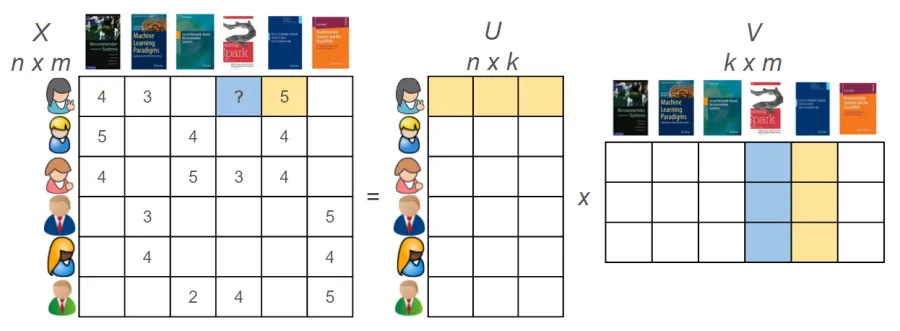

In [ ]:
# Это вот такая матрица, где строки - это индексы User_id
# Столбцы - video_id
# Пересечение - это тип взаимодействия

# т.е. мы просто переводим наш датасет в нужный формат рек систем - МЫ ЭТО ОБСУЖДАЛИ ВООБЩЕ :)

**SciPy.Sparse**

**Matrix types**

Sparse matrix - разреженная матрица, которая хранит только известные значения.

Виды разреженных матриц в scipy.sparse:

- coo_matrix - A sparse matrix in COOrdinate format
- csc_matrix - Compressed Sparse Column matrix
- csr_matrix - Compressed Sparse Row matrix
- bsr_matrix - Block Sparse Row matrix
- dia_matrix - Sparse matrix with DIAgonal storage
- dok_matrix - Dictionary Of Keys based sparse matrix
- lil_matrix - Row-based list of lists sparse matrix

Их можно разделить на две группы:

- Классы для создания матриц
    - coo_matrix - тройки (строка, столбец, значение)
    - dok_matrix - словарь, где ключ - кортеж из строки и столбца, а значение - это значение :)
    - lil_matrix - список из списков, где внутренние списки - это строки
- Классы оптимизированные под оптимальное хранение и операции над матрицами
    - csr_matrix - сжатое построчное представление
    - csc_matrix - сжатое представление по столбцам
    - bsr_matrix - как csr_matrix, только хранятся "плотные блоки"
    - dia_matrix - диагональное представление

**На практике чаще всего встречаются coo_matrix, csr_matrix и csc_matrix**

рекомендую почитать и запустить чтобы поэксперементировать и понят: https://www.kaggle.com/code/sharthz23/pandas-scipy-for-recsys

In [ ]:
# # МИНИ ПРИМЕР НА МИНИ ДАТАСЕТЕ example
# # Создаем разреженную матрицу взаимодействий
# train_mat_example = coo_matrix((
#     example['interaction'].values,
#     (example['user_id'].map(users_mapping_example),
#      example['video_id'].map(items_mapping_example))
# ))

# train_mat_example.toarray()

array([[1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
# Инициализируем и обучаем модель
model = LightFM(no_components=5)

model.fit(train_mat_example)

# Делаем предсказание для user_id = 101
user_id = 101
user_index = users_mapping_example[user_id]

# список индексов для видео
item_indices = np.array(list(items_mapping_example.values()))

# Предсказания
predictions = model.predict(user_index, item_indices)

# Собираем результаты
recommendations = sorted(zip(predictions, items_inv_mapping_example.values()), reverse=True)

# Печатаем топ-N рекомендаций
top_n = 3
print(f"Топ-{top_n} рекомендаций для пользователя {user_id}:")

for score, item_id in recommendations[:top_n]:
    print(f"Видео {item_id} с оценкой {score:.2f}")

Топ-3 рекомендаций для пользователя 101:
Видео 201 с оценкой 0.08
Видео 204 с оценкой 0.07
Видео 202 с оценкой 0.07


In [ ]:
# теперь для нашего датасет
train_mat = get_coo_matrix(df=train,user_col='user_id', item_col='video_id', \
                           weight_col='index', users_mapping=users_mapping, \
                           items_mapping=items_mapping).tocsr()

train_mat
# 152911 x 228506 = 152911 (количество пользователе) 228506 (количество видео)

<152911x228506 sparse matrix of type '<class 'numpy.float32'>'
	with 4926266 stored elements in Compressed Sparse Row format>

In [ ]:
print(train['video_id'].nunique())
len(items_mapping)

226178


228506

In [ ]:
train_df['video_id'].nunique()

228506

In [ ]:
video_features_all.shape

(228506, 4)

In [ ]:
print(train_df['user_id'].nunique(), train_df['video_id'].nunique()) # Это совсем исходные датсет
print(train['user_id'].nunique(), train['video_id'].nunique()) # это после train_val_split

152911 228506
152911 202133


In [ ]:
!pip install lightfm --quiet

In [ ]:
from lightfm import LightFM
# создали модель
# no_components=5 — это размер векторов пользователей и видео (количество скрытых факторов).
# Чем больше компонентов, тем больше нюансов модель может уловить, но она будет сложнее и медленнее.
model = LightFM(no_components=5)

# обучаем на матрице взаимодействия user_id и video_id
model.fit(train_mat)
# обучается меньше секунды

In [ ]:
# ranks_lst_all = model.predict(user_id, item_ids)

# Вход: ID пользователя и список ID видео.
# Выход: Список оценок (чем выше — тем вероятнее, что пользователю понравится видео) ->
# возвращает взаимодейтсвие по сути или его отсутвие

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


In [ ]:
np.arange(train_mat.shape[1]) # по сути порядковый video id берем, можно брать из items_mapping_example, тоже самое будет

array([     0,      1,      2, ..., 228503, 228504, 228505])

In [ ]:
len(np.arange(train_mat.shape[1]))

228506

In [ ]:
print(train_df['user_id'].nunique(), train_df['video_id'].nunique()) # Это совсем исходные датсет
print(train['user_id'].nunique(), train['video_id'].nunique()) # это после train_val_split

152911 228506
152911 202133


In [ ]:
2**8

256

In [ ]:
# делаем predict только по батчам, чтобы было быстрее и меньше памяти
from tqdm import tqdm

def predict_impl_batched(model, test_users, mat, users_mapping, items_inv_mapping, batch_size=256, N=10, falh=True):

    recs, scores = [], []
    N = len(test_users)

    # проходимся по батчам
    for i in tqdm(range(0, N, batch_size)):
        # выбираем пользователей в батче
        ids = test_users[i:i + batch_size]
        # берем им id порядковое, а не то которое было в train
        # {101: 0, 102: 1, 103: 2, 104: 3}
        # по сути у user_id было id 101, а взяли как 0
        row_id = [users_mapping[id] for id in ids]

        # Предсказания для ВСЕХ видео для каждого пользователя
        # это по сути цикл
        # берем пользователя из батча и делаем предсказание, потом другого
        ranks = np.array([
            model.predict(uid, np.arange(mat.shape[1]), item_features=item_features_csr)
            for uid in row_id
        ])

        # сохраняем результат
        for rank_row in ranks:
            top_items = np.argsort(-rank_row)[:N]  # Топ-N видео
            recs += [[items_inv_mapping.get(it) for it in top_items]]
            scores += [rank_row[top_items]]

    return recs, scores

In [ ]:
# По сути, это финальный шаг, когда мы берём тестовых пользователей,
# делаем предсказания и оцениваем их качество с помощью метрики MAP@K.

# Подготовка тестовой выборки
val_group = val_targets.groupby('user_id')
act = val_group['video_id'].agg(lambda x:x.tolist()).tolist() # список списков video_id для каждого пользователя

# ПО СУТИ СДЕЛАЛИ ВЕКТОР ОТВЕТОВ ДЛЯ VAL
# список video id для user_id = 0
act[0]

[59925, 42031, 131525, 28545, 42031, 188589, 195593, 191808]

In [ ]:
val_users = val_group.agg(lambda x:x.tolist()).index.tolist()
print(len(val_users))

# Это индексы пользователей, по сути наш X в val
# ПОТОМУ ЧТО НА train мы обучали модель

# помните выше делили исходную выборку?

10000


In [ ]:
%%time

# Делаем предсказание
k_top = 10

# def predict_impl_batched(model, test_users, mat, users_mapping, items_inv_mapping, batch_size=1024, N=10, falh=True):

test_preds, test_scores = predict_impl_batched(model,
                                               val_users, # список user id в val подчасти
                                               train_mat, # матрица взаимодействия
                                               users_mapping, # словарь user id + порядковый номер
                                               items_inv_mapping, # список video id
                                               N = k_top,
                                               falh = True)

# test_preds — список рекомендованных видео для каждого пользователя
# test_scores — оценки уверенности модели в этих рекомендациях (хотя они здесь не используются)

# 0.0074184320672713525
mapk(val_labels, test_preds, k = k_top)

100%|██████████| 40/40 [07:45<00:00, 11.64s/it]

CPU times: user 7min 28s, sys: 8.62 s, total: 7min 37s
Wall time: 7min 45s


0.00894857596371882

In [ ]:
owner_df

,owner_id,subscribers_count,last_active_date,city_id,create_date
0,7526,165651,1683122607372,NaN,1209015879040
1,8097,21447,1701308453896,NaN,1209043652837
2,1045,20541,1695378534162,8fb6fe36d1084805b2d52275f0de118124693863427a64...,1209045732987
3,5109,34665,1699803582198,8fb6fe36d1084805b2d52275f0de118124693863427a64...,1209054276227
4,8032,14301,1700229880599,NaN,1209057220000
...,...,...,...,...,...
8109,10,581,1698438841492,NaN,1698082764500
8110,2804,1623,1698438929664,NaN,1698084693791
8111,2812,1137,1698438794922,NaN,1698084755452
8112,4782,186,1702984991212,NaN,1698601431164


In [ ]:
video_features_all

,sum,count,index,video_id
video_id,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
4,0,1,1,4
5,1,6,16,5
...,...,...,...,...
253505,0,1,1,253505
253506,0,1,1,253506
253507,0,1,1,253507


In [ ]:
video_features_all[['video_id','index']].index = range(video_features_all.shape[0])

video_features_all['range'] = range(video_features_all.shape[0])
video_features_all = video_features_all.set_index('range')

video_features_all

,sum,count,index,video_id
range,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
3,0,1,1,4
4,1,6,16,5
...,...,...,...,...
228501,0,1,1,253505
228502,0,1,1,253506
228503,0,1,1,253507


In [ ]:
from scipy.sparse import csr_matrix

# video_features_all = video_features_all.drop(columns=['video_id']).reset_index()
item_features = video_features_all.merge(video_df, on='video_id')

item_features = item_features.merge(owner_df, on='owner_id')

item_features = item_features.drop(columns=['last_active_date', 'city_id', 'create_date'])
item_features = item_features.set_index('video_id')

item_features

,sum,count,index,owner_id,duration,upload_timestamp,subscribers_count
video_id,,,,,,,
0,0,1,1,271,19,1693672302704,104675
1,1,1,11,159,5774,1620846952881,235195
2,0,10,10,7984,32,1698430831281,534053
4,0,1,1,2601,687,1697519150113,44104
5,1,6,16,6631,213,1696082983636,101561
...,...,...,...,...,...,...,...
253505,0,1,1,6532,29,1646592137299,83171
253506,0,1,1,1682,5426,1544454934570,895182
253507,0,1,1,6591,174,1684406743445,21835


In [ ]:
item_features_csr = csr_matrix(item_features)
item_features_csr

<228506x7 sparse matrix of type '<class 'numpy.int64'>'
	with 1456836 stored elements in Compressed Sparse Row format>

In [ ]:
train_mat
# 228506 - 226394

<152911x228506 sparse matrix of type '<class 'numpy.float32'>'
	with 4927551 stored elements in Compressed Sparse Row format>

In [ ]:
from lightfm import LightFM
# создали модель
# no_components=5 — это размер векторов пользователей и видео (количество скрытых факторов).
# Чем больше компонентов, тем больше нюансов модель может уловить, но она будет сложнее и медленнее.
model = LightFM(no_components=5)

# обучаем на матрице взаимодействия user_id и video_id
model.fit(train_mat,
          item_features = item_features_csr)
# обучается меньше секунды

In [ ]:
video_features_all

,sum,count,index,video_id
range,,,,
0,0,1,1,0
1,1,1,11,1
2,0,10,10,2
3,0,1,1,4
4,1,6,16,5
...,...,...,...,...
228501,0,1,1,253505
228502,0,1,1,253506
228503,0,1,1,253507


In [ ]:
%%time

# Делаем предсказание
k_top = 10

# def predict_impl_batched(model, test_users, mat, users_mapping, items_inv_mapping, batch_size=1024, N=10, falh=True):

test_preds, test_scores = predict_impl_batched(model,
                                               val_users, # список user id в val подчасти
                                               train_mat, # матрица взаимодействия
                                               users_mapping, # словарь user id + порядковый номер
                                               items_inv_mapping, # список video id
                                               N = k_top,
                                               falh = True)

# test_preds — список рекомендованных видео для каждого пользователя
# test_scores — оценки уверенности модели в этих рекомендациях (хотя они здесь не используются)

# 0.0074184320672713525
mapk(val_labels, test_preds, k = k_top)

100%|██████████| 40/40 [10:47<00:00, 16.18s/it]

CPU times: user 10min 31s, sys: 9.87 s, total: 10min 40s
Wall time: 10min 47s


1.0873015873015873e-05

In [ ]:
np.array(test_preds).shape

(10000, 10000)

In [ ]:
# recs, scores
np.array(test_preds)

array([[ 65495,  23268, 141082, ..., 196289,  24298, 252715],
       [ 65495,  23268, 141082, ..., 203871, 252715, 199714],
       [ 65495,  23268, 141082, ..., 196289, 130724, 204333],
       ...,
       [ 65495,  23268, 141082, ..., 203871, 252715, 199714],
       [ 65495,  23268, 141082, ..., 203871, 252715, 199714],
       [ 65495,  23268, 141082, ..., 251320, 130724,  91716]])

In [ ]:
groups.get_group(100)

,interaction_type,timestamp,user_id,video_id
38006,view,1696302309880,100,107178
180322,like,1696513197757,100,3814
180541,view,1696513267514,100,3814
2407266,view,1696586632939,100,198226
5339933,view,1696597526709,100,51358
2211937,like,1697006220495,100,45012
2257520,view,1697023533564,100,85876
2269576,view,1697027779187,100,38943
572243,like,1697086262087,100,114041
572267,like,1697086268494,100,114041


In [ ]:
uid = 100

In [ ]:
pred_100 = model.predict(uid, np.arange(train_mat.shape[1]), item_features=item_features_csr)

pred_100.shape

(228506,)

In [ ]:
top_items = np.argsort(pred_100)[:10]  # Топ-N видео

top_items

array([ 29315,  88079,  49813, 183047,  93467, 178959, 218890, 151301,
       173540,  16297])

In [ ]:
recs = [[items_inv_mapping.get(it) for it in top_items]]
recs

[[32548, 162224, 91515, 13147, 245631, 241625, 183927, 71620, 191580, 220090]]

In [ ]:
train_df[train_df['video_id'] == 220090]

,interaction_type,timestamp,user_id,video_id,is_like
3819889,view,1698488504754,1430,220090,0
1177825,view,1698119462997,4913,220090,0
1630059,view,1698057355849,20686,220090,0
1630629,like,1698057580782,20686,220090,1
1747134,view,1697998368685,21412,220090,0
1814593,view,1698040347401,25075,220090,0
3294808,view,1698253340810,28217,220090,0
3294815,like,1698253343312,28217,220090,1
3693642,view,1698161662551,38152,220090,0
1206468,view,1698132428285,38755,220090,0


In [ ]:
groups.get_group(100)

,interaction_type,timestamp,user_id,video_id
38006,view,1696302309880,100,107178
180322,like,1696513197757,100,3814
180541,view,1696513267514,100,3814
2407266,view,1696586632939,100,198226
5339933,view,1696597526709,100,51358
2211937,like,1697006220495,100,45012
2257520,view,1697023533564,100,85876
2269576,view,1697027779187,100,38943
572243,like,1697086262087,100,114041
572267,like,1697086268494,100,114041


# Рекомендательная система AlternatingLeastSquares

In [ ]:
# Collaborative Filtering
import polars as pl
from implicit.als import AlternatingLeastSquares
from scipy.sparse import coo_matrix

# 1. Загружаем данные
train = pl.read_csv("train.csv")

# 2. Кодируем пользователей и видео в индексы
users = train['user_id'].to_pandas().astype('category')
videos = train['video_id'].to_pandas().astype('category')

# 3. Строим sparse матрицу взаимодействий
rows = users.cat.codes
cols = videos.cat.codes
values = (train['interaction_type'] == 'like').cast(int) + 1  # лайки весим сильнее

matrix = coo_matrix((values, (rows, cols)))

# 4. Обучаем ALS модель
model = AlternatingLeastSquares(factors=64, regularization=0.01)
model.fit(matrix.T)

# 5. Генерируем рекомендации
recommendations = model.recommend(user=0, user_items=matrix[0], N=10)